In [1]:
import numpy as np
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from load_data import load_scaled_data

X, y = load_scaled_data()

c:\python310\lib\site-packages\sklearn\utils\_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.3)
  from scipy.sparse import csr_matrix, issparse


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Моедли

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

In [6]:
from sklearn.metrics import r2_score
grad_booster_sklearn = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=33, max_depth=5)

grad_booster_sklearn.fit(X_train, y_train.reshape(-1,))
y_pred = grad_booster_sklearn.predict(X_test)
print(r2_score(y_test, y_pred))

0.830585628848797


In [7]:
from gradboosting import CustomGradientBoostingRegressor

grad_booster_custom = CustomGradientBoostingRegressor(n_estimators=200, learning_rate=0.1, subsample=0.8, max_depth=5)
grad_booster_custom.fit(X_train, y_train)
y_pred_cust = grad_booster_custom.predict(X_test)
print(r2_score(y_test, y_pred_cust))

0.8299591923771723


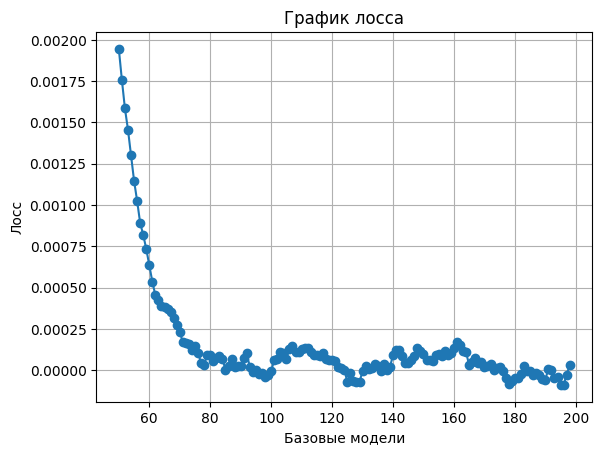

In [8]:
import matplotlib.pyplot as plt

loss_history = grad_booster_custom.get_history()
a,b = 50, -1
plt.plot(range(len(loss_history))[a:b], loss_history[a:b], marker='o')
plt.title('График лосса')
plt.xlabel('Базовые модели')
plt.ylabel('Лосс')
plt.grid()
plt.show()


# Время

In [9]:
gb_sklearn = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
%timeit gb_sklearn.fit(X_train, y_train.reshape(-1,))

8.24 s ± 334 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
gb_custom = CustomGradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
%timeit gb_custom.fit(X_train, y_train)

7.82 s ± 488 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
